# Simple Linear Regression Analysis

## 1. Import Required Libraries
This section imports all the necessary libraries for data manipulation, visualization, and machine learning.

In [1]:
# Import necessary libraries for data analysis and machine learning
import pandas as pd  # For data manipulation and analysis
import numpy as np   # For numerical operations
import matplotlib.pyplot as plt  # For data visualization
from sklearn.linear_model import LinearRegression  # Linear regression model
from sklearn.model_selection import train_test_split  # For splitting data into train/test sets

## 2. Data Loading and Initial Exploration
Loading the fuel consumption dataset and performing initial data exploration.

In [2]:
# Load the fuel consumption dataset
df = pd.read_csv('FuelConsumptionCo2.csv')
# Display the first 5 rows to understand the data structure
df.head(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
# Get statistical summary of the dataset
# This shows count, mean, std, min, 25%, 50%, 75%, and max values
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


## 3. Data Preprocessing
Selecting relevant features for our regression analysis.

In [4]:
# Select relevant features for regression analysis
# These features are most likely to influence CO2 emissions
modify_df = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS']]
# Display the first 5 rows of the selected features
modify_df.head(5)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,4,8.5,33,196
1,2.4,4,9.6,29,221
2,1.5,4,5.9,48,136
3,3.5,6,11.1,25,255
4,3.5,6,10.6,27,244


## 4. Exploratory Data Analysis (EDA)
Visualizing the distribution of features and their relationships with CO2 emissions.

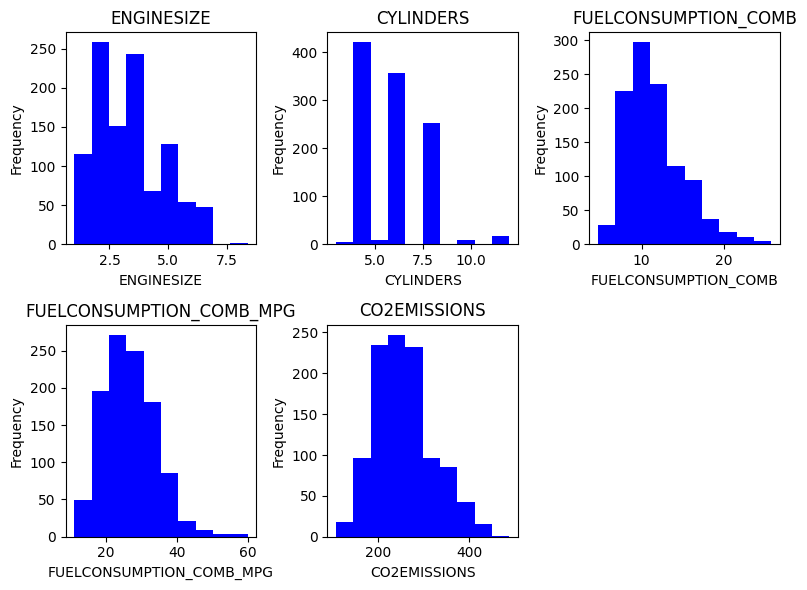

In [5]:
# Create histograms for all features to understand their distributions
plt.figure(figsize=(8, 6))

features = modify_df.columns

# Create subplots for each feature
for i, feature in enumerate(features):
    plt.subplot(2, 3, i+1)  # 2 rows, 3 columns layout
    plt.hist(modify_df[feature], bins=10, color='blue')
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel('Frequency')  # Fixed typo: 'Frequently' -> 'Frequency'

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

### 4.1 Relationship Analysis - Scatter Plots
Analyzing the relationship between different features and CO2 emissions.

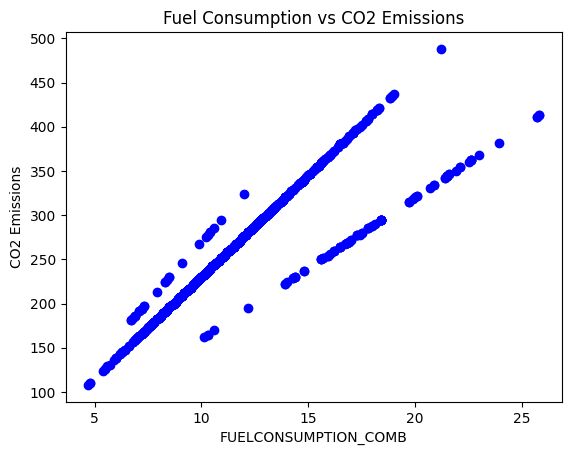

In [6]:
# Scatter plot: Fuel Consumption (Combined) vs CO2 Emissions
# This shows the relationship between fuel consumption and emissions
plt.scatter(modify_df.FUELCONSUMPTION_COMB, modify_df.CO2EMISSIONS, c='blue')
plt.xlabel('FUELCONSUMPTION_COMB')
plt.ylabel('CO2 Emissions')
plt.title('Fuel Consumption vs CO2 Emissions')
plt.show()

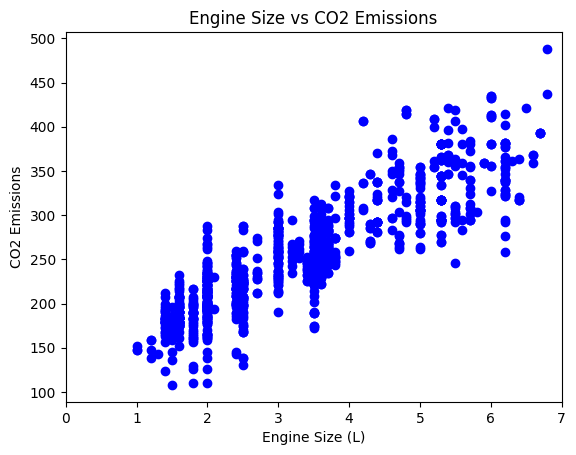

In [7]:
# Scatter plot: Engine Size vs CO2 Emissions
# This shows how engine size affects CO2 emissions
plt.scatter(modify_df.ENGINESIZE, modify_df.CO2EMISSIONS, c='blue')
plt.xlabel('Engine Size (L)')
plt.ylabel('CO2 Emissions')
plt.title('Engine Size vs CO2 Emissions')
plt.xlim((0, 7))  # Set reasonable x-axis limits
plt.show()

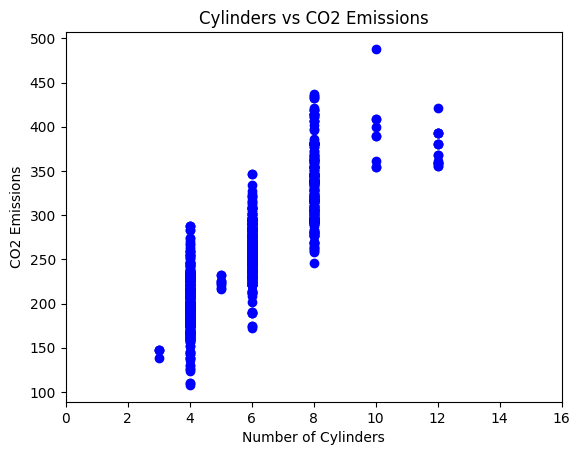

In [8]:
# Scatter plot: Number of Cylinders vs CO2 Emissions
# This shows how the number of cylinders affects emissions
plt.scatter(modify_df.CYLINDERS, modify_df.CO2EMISSIONS, c='blue')
plt.xlabel('Number of Cylinders')
plt.ylabel('CO2 Emissions')  # Fixed typo: 'Emisson' -> 'CO2 Emissions'
plt.title('Cylinders vs CO2 Emissions')
plt.xlim(0, 16)  # Set reasonable x-axis limits
plt.show()

## 5. Model Building - Simple Linear Regression
Building a simple linear regression model using Engine Size to predict CO2 emissions.

In [9]:
# Prepare features and target variables for modeling
X = modify_df[['ENGINESIZE']].values  # Feature: Engine Size (2D array for sklearn)
y = modify_df[['CO2EMISSIONS']].values  # Target: CO2 Emissions (2D array)

# Split data into training and testing sets (80% train, 20% test)
# random_state=42 ensures reproducible results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 5.1 Model Training
Training the linear regression model and extracting coefficients.

In [11]:
# Create a Simple Linear Regression model instance
slr = LinearRegression()

# Train the model using the training data
# This finds the best fit line: y = mx + b
slr.fit(X_train, y_train)

LinearRegression()

In [12]:
# Extract model parameters (coefficient and intercept)
coef = slr.coef_        # Slope (m) - how much CO2 changes per unit engine size
intercept = slr.intercept_  # Y-intercept (b) - base CO2 emission

# Display the linear equation parameters
# The equation is: CO2 = coef * EngineSize + intercept
print(f'Coefficient (slope): {coef[0][0]:.2f}')
print(f'Intercept: {intercept[0]:.2f}')
print(f'Linear Equation: CO2 = {coef[0][0]:.2f} * EngineSize + {intercept[0]:.2f}')

Coefficient (slope): 38.99
Intercept: 126.29
Linear Equation: CO2 = 38.99 * EngineSize + 126.29


### 5.2 Model Prediction and Visualization
Making predictions on test data and visualizing the regression line.

In [14]:
# Make predictions on the test set
# This applies our trained model to unseen data
y_pred = slr.predict(X_test)

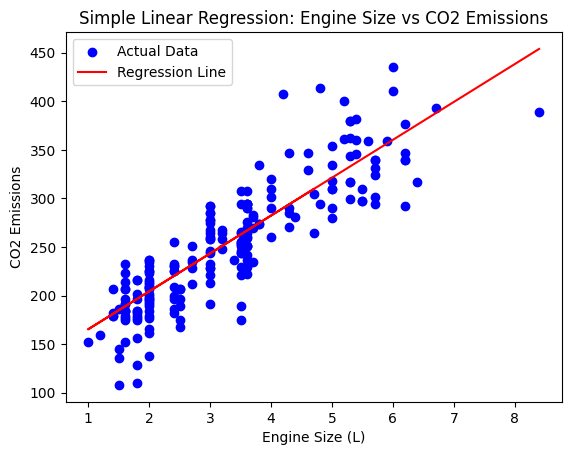

In [15]:
# Visualize the regression results
# Blue dots: actual test data points
# Red line: predicted regression line
plt.scatter(X_test, y_test, c='blue', label='Actual Data')
plt.plot(X_test, y_pred, c='red', label='Regression Line')
plt.xlabel('Engine Size (L)')
plt.ylabel('CO2 Emissions')
plt.title('Simple Linear Regression: Engine Size vs CO2 Emissions')
plt.legend()
plt.show()

# 6. Model Evaluation
Evaluating the performance of our linear regression model using various metrics.

In [16]:
# Import evaluation metrics from sklearn
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate various performance metrics
mea = mean_absolute_error(y_test, y_pred)     # Average absolute difference
mse = mean_squared_error(y_test, y_pred)      # Average squared difference
rmse = np.sqrt(mse)                           # Square root of MSE (same units as target)
r2 = r2_score(y_test, y_pred)                 # R-squared (coefficient of determination)

# Display the evaluation results
print("Model Performance Metrics:")
print(f'MAE (Mean Absolute Error): {mea:.2f}')
print(f'MSE (Mean Squared Error): {mse:.2f}')
print(f'RMSE (Root Mean Squared Error): {rmse:.2f}')
print(f'R² Score (Coefficient of Determination): {r2:.2f}')
print(f'\nInterpretation:')
print(f'- On average, predictions are off by {mea:.2f} units')
print(f'- Model explains {r2*100:.1f}% of the variance in CO2 emissions')

Model Performance Metrics:
MAE (Mean Absolute Error): 24.10
MSE (Mean Squared Error): 985.94
RMSE (Root Mean Squared Error): 31.40
R² Score (Coefficient of Determination): 0.76

Interpretation:
- On average, predictions are off by 24.10 units
- Model explains 76.2% of the variance in CO2 emissions


## 7. Alternative Model Comparison
### Comparing Engine Size vs Fuel Consumption as Predictors
Let's compare the performance when using `FUELCONSUMPTION_COMB` instead of `ENGINESIZE` as the predictor.

In [17]:
# Prepare data using Fuel Consumption (Combined) as the feature
X_fc = modify_df[['FUELCONSUMPTION_COMB']].values

# Split the data with the same random state for fair comparison
X_train_fc, X_test_fc, y_train_fc, y_test_fc = train_test_split(X_fc, y, test_size=0.2, random_state=42)

In [18]:
# Create and train a new linear regression model using fuel consumption
slr_fc = LinearRegression()
slr_fc.fit(X_train_fc, y_train_fc)

LinearRegression()

In [19]:
# Make predictions using the fuel consumption model
y_pred_fc = slr_fc.predict(X_test_fc)

In [20]:
# Calculate and compare MSE for both models
mse_engine = mean_squared_error(y_test, y_pred)        # Engine Size model
mse_fuel = mean_squared_error(y_test_fc, y_pred_fc)    # Fuel Consumption model

print("Model Comparison:")
print(f'MSE (Engine Size model): {mse_engine:.2f}')
print(f'MSE (Fuel Consumption model): {mse_fuel:.2f}')
print(f'\nBetter model: {"Fuel Consumption" if mse_fuel < mse_engine else "Engine Size"} (lower MSE is better)')

# Calculate additional metrics for fuel consumption model
r2_fuel = r2_score(y_test_fc, y_pred_fc)
print(f'R² Score (Fuel Consumption model): {r2_fuel:.2f}')
print(f'R² Score (Engine Size model): {r2:.2f}')

Model Comparison:
MSE (Engine Size model): 985.94
MSE (Fuel Consumption model): 797.43

Better model: Fuel Consumption (lower MSE is better)
R² Score (Fuel Consumption model): 0.81
R² Score (Engine Size model): 0.76


## 8. Conclusion

### Key Findings:
1. **Linear Relationship**: Both engine size and fuel consumption show strong linear relationships with CO2 emissions
2. **Model Performance**: The linear regression model provides reasonable predictions for CO2 emissions
3. **Feature Comparison**: We compared two different features (engine size vs fuel consumption) to see which is a better predictor

### Model Insights:
- **Engine Size Model**: Shows how engine displacement affects emissions
- **Fuel Consumption Model**: Directly relates fuel usage to emissions
- Both models can be used for predicting vehicle emissions based on their specifications

### Next Steps:
- Consider multiple linear regression using both features
- Explore polynomial regression for potential non-linear relationships
- Add more features like vehicle weight, transmission type, etc.